In [1]:
import numpy as np
import keras
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models

In [3]:
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

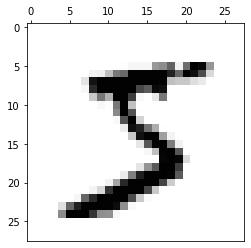

In [4]:
from matplotlib import pyplot
import matplotlib as mpl
import random
%matplotlib inline 

#Print an image randomly selected
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(train_images[random.randint(0,9)], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

In [5]:
#Number of channels 
channels = 1

#Reshaping on TRAIN 
train_images = train_images.reshape((train_images.shape[0], 
                                     train_images.shape[1], 
                                     train_images.shape[2],
                                     channels))
train_images = train_images.astype('float32') / 255

#Reshaping on TEST 
test_images = test_images.reshape((test_images.shape[0], 
                                   test_images.shape[1], 
                                   test_images.shape[2],
                                   channels))
test_images = test_images.astype('float32') / 255

#Labels transforming into categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
#number of classes
num_class  = train_labels.shape[1]

In [7]:
train_images.shape[1:]

(28, 28, 1)

In [7]:
#definition of CNN function

def CNN(dim_pool):
    
    model = models.Sequential()
    model.add(layers.Conv2D(16,(3,3),activation='relu', 
                                     input_shape=train_images.shape[1:]))
    model.add(layers.AveragePooling2D(dim_pool))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.AveragePooling2D(dim_pool))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_class, activation='softmax'))
    model.summary()
    
    return model

In [8]:
#model
model = CNN(dim_pool = (2,2))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 6,490
Trainable params: 6,490
Non-trainable params: 0
____________________________________________________

In [9]:
#FITTING of the CNN
from keras import optimizers

adam = optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])

model_history = model.fit(train_images, train_labels, validation_split = 0.1,
                          batch_size=128, epochs=15, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 18s 328us/step - loss: 0.5358 - accuracy: 0.8442 - val_loss: 0.1827 - val_accuracy: 0.9510
Epoch 2/15
54000/54000 [==============================] - 17s 322us/step - loss: 0.1836 - accuracy: 0.9470 - val_loss: 0.1224 - val_accuracy: 0.9673
Epoch 3/15
54000/54000 [==============================] - 17s 320us/step - loss: 0.1306 - accuracy: 0.9611 - val_loss: 0.0995 - val_accuracy: 0.9760
Epoch 4/15
54000/54000 [==============================] - 17s 317us/step - loss: 0.1089 - accuracy: 0.9671 - val_loss: 0.0954 - val_accuracy: 0.9748
Epoch 5/15
54000/54000 [==============================] - 17s 311us/step - loss: 0.0959 - accuracy: 0.9708 - val_loss: 0.0772 - val_accuracy: 0.9787
Epoch 6/15
54000/54000 [==============================] - 16s 289us/step - loss: 0.0862 - accuracy: 0.9745 - val_loss: 0.0768 - val_accuracy: 0.9800
Epoch 7/15
54000/54000 [==============================] -

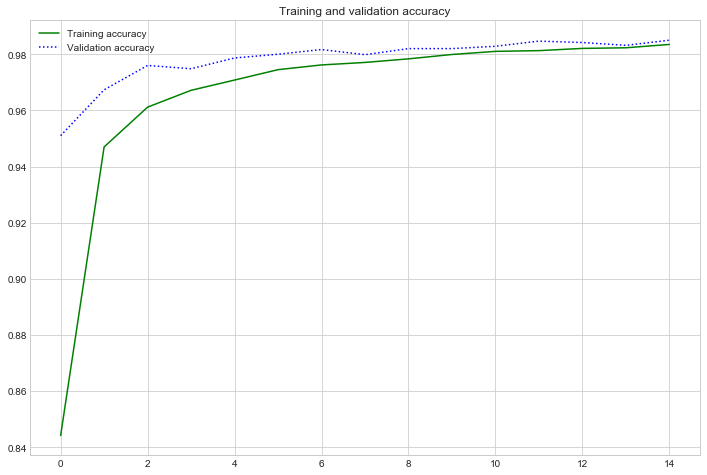

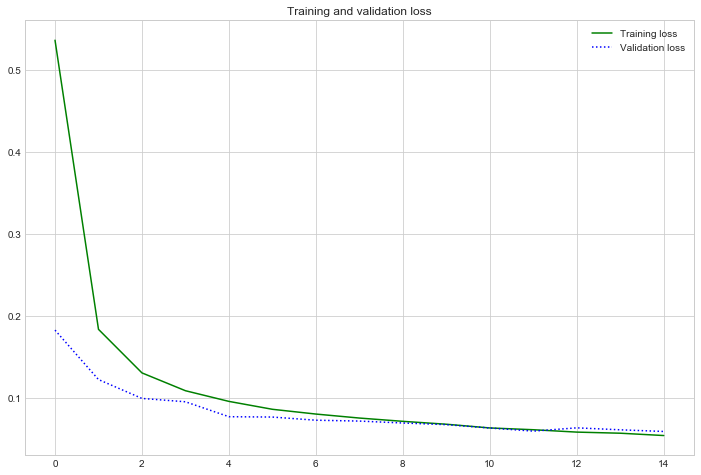

In [10]:
import matplotlib.pyplot as plt

epoch = model_history.epoch

plt.style.use('seaborn-whitegrid')
loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy']
 
plt.figure(figsize=(12,8))
plt.plot(epoch, loss, 'g', label='Training accuracy')
plt.plot(epoch, val_loss, 'b:', label='Validation accuracy')
plt.title('Training and validation accuracy')
#plt.ylim(0.95,1)
plt.legend()
plt.show()

plt.style.use('seaborn-whitegrid')
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
 
plt.figure(figsize=(12,8))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import classification_report

#metrics on TRAIN set
y_train_pred = model.predict_classes(train_images)
y_train_true = []
for i in range(len(train_labels)):
    y_train_true.append(np.argmax(train_labels[i]))
y_train_true=np.array(y_train_true)

target_num = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
print('Classification Report: TRAIN\n\n', classification_report(y_train_true, y_train_pred, target_names=target_num))

Classification Report: TRAIN

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.97      0.99      0.98      5958
           3       0.99      0.97      0.98      6131
           4       0.99      0.99      0.99      5842
           5       0.97      0.99      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.98      0.98      6265
           8       0.97      0.98      0.98      5851
           9       0.98      0.97      0.98      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [12]:
#metrics on TEST set
y_test_pred = model.predict_classes(test_images)
y_test_true = []
for i in range(len(test_labels)):
    y_test_true.append(np.argmax(test_labels[i]))
y_test_true=np.array(y_test_true)

target_num = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
print('Classification Report: TEST\n\n',classification_report(y_test_true, y_test_pred, target_names=target_num))

Classification Report: TEST

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

